In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df_train_1 = pd.read_pickle('data/train_part1.pkl')

In [70]:
df_test_1 = pd.read_pickle('data/test_data.pkl')

In [3]:
df_train_1.shape

(763801, 648)

In [4]:
cols_to_leave_10 = df_train_1.columns[df_train_1.isna().sum() / df_train_1.shape[0] < 0.1]

In [5]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763801 entries, 0 to 971631
Columns: 648 entries, REPORT_DT to ID
dtypes: datetime64[ns](2), float64(613), int64(17), object(16)
memory usage: 3.7+ GB


In [6]:
df_train_1 = df_train_1[cols_to_leave_10]

In [7]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763801 entries, 0 to 971631
Data columns (total 67 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   REPORT_DT  763801 non-null  datetime64[ns]
 1   x_0        763801 non-null  int64         
 2   x_1        763801 non-null  int64         
 3   x_2        763801 non-null  int64         
 4   x_3        763801 non-null  int64         
 5   x_4        763801 non-null  float64       
 6   x_5        763801 non-null  float64       
 7   x_7        763801 non-null  float64       
 8   x_9        763801 non-null  datetime64[ns]
 9   x_10       763801 non-null  float64       
 10  x_11       763801 non-null  int64         
 11  x_12       763801 non-null  object        
 12  x_13       763751 non-null  object        
 13  x_14       763801 non-null  int64         
 14  x_15       760374 non-null  float64       
 15  x_16       760606 non-null  float64       
 16  x_18       763801 no

<AxesSubplot:>

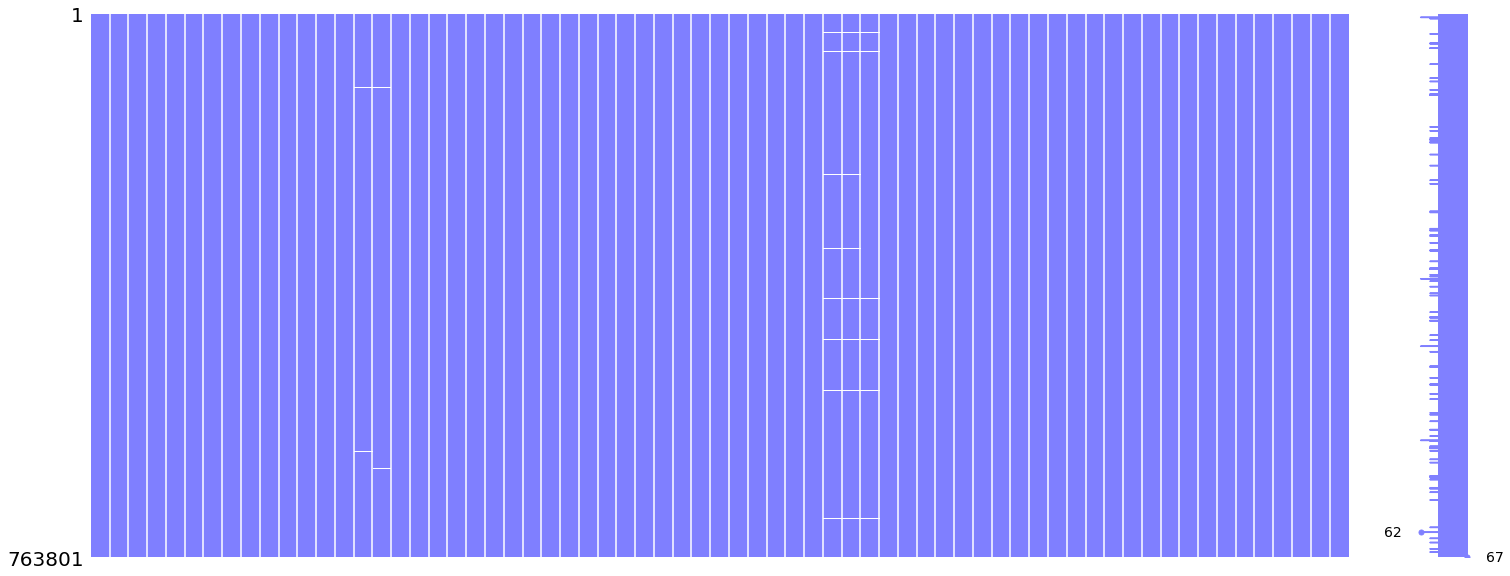

In [8]:
msno.matrix(df_train_1,
            color=(0.5, 0.5, 1),
            sparkline=True)

In [9]:
df_train_1 = df_train_1.dropna()

In [11]:
df_train_1.shape

(747926, 67)

In [18]:
for i in df_train_1.dtypes:
    if i == 'O':
        print(i)

object
object
object
object
object
object
object
object
object
object
object
object


In [19]:
df_train_1.head()

,REPORT_DT,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_9,x_10,...,x_638,x_639,x_640,x_641,x_643,x_644,x_645,x_646,TARGET,ID
0,2019-08-25,1,0,1,1,2100000.0,1505828.87,1505828.87,2017-03-20,1400000.0,...,15000.00,11.75,0.436268,0.436268,28,22757.85,0.505730,0.716184,0,0
1,2019-06-27,1,0,1,1,900000.0,363535.29,363535.29,2017-02-02,900000.0,...,0.00,12.25,0.321785,0.321785,28,20133.89,0.268452,0.268452,0,1
2,2018-01-09,1,0,1,1,1000000.0,990956.71,982069.19,2017-09-20,1000000.0,...,50000.00,7.90,0.284704,0.284704,4,15536.44,0.154156,0.348582,0,2
3,2019-09-03,1,0,1,1,1400000.0,566338.60,564045.39,2015-02-06,1400000.0,...,0.00,15.75,0.274333,0.274333,55,20318.31,0.239039,0.239039,0,3
4,2017-12-18,1,0,1,1,2114500.0,1414693.51,1396391.57,2014-10-13,1700000.0,...,100148.58,13.00,0.382492,0.382492,36,24772.97,0.190561,0.238575,0,4


In [21]:
df_train_1.to_csv('data/train1_clean.csv')

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier

In [108]:
FEATURES = ['x_2','x_3','x_4','x_5','x_7', 'x_21']
y = df_train_1['TARGET']
X = df_train_1[FEATURES]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=train_target, 
                                                    test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train_data, train_target, eval_train, eval_target = train_test_split(X_train,
                                                                     y_train,
                                                                     stratify=train_target, 
                                                                     test_size=0.25)

print(train_data.shape, train_target.shape, eval_train.shape, eval_target.shape)

In [65]:
train_dataset = Pool(data=train_data,
                     label=train_target,
                     cat_features=['x_21'])

In [66]:
model = CatBoostClassifier()

model.fit(train_dataset)

In [69]:
model.best_score_

{'learn': {'Logloss': 0.15620286496696492}}

In [72]:
test_data = df_test_1[FEATURES]

In [113]:
test_data

,x_2,x_3,x_4,x_5,x_7,x_21
1943531,1,1,1100000.0,157773.90,157773.90,Приобретение
1943532,1,1,2580000.0,2187426.61,2183868.19,Приобретение
1943533,1,1,1200000.0,385763.26,218655.96,Приобретение
1943534,1,1,637500.0,595369.13,595369.13,Приобретение
1943537,1,1,1232500.0,1118118.29,1118118.29,Приобретение
...,...,...,...,...,...,...
3290365,1,1,1021000.0,943992.37,940500.37,Приобретение
3290366,1,1,1546974.0,294040.56,290902.27,Приобретение
3290367,1,1,800000.0,498600.61,498600.61,Приобретение
3290368,1,1,712000.0,157083.71,147504.75,Приобретение


In [88]:
test_preds_proba = model.predict_proba(test_data)[:,0]

In [112]:
test_preds_proba

array([0.98310773, 0.91630898, 1.        , ..., 0.93812281, 0.99019038,
       0.97703477])

In [110]:
submission = pd.read_csv('data/submission.csv')

submission['Probability'] = test_preds_proba

submission.to_csv('data/submission.csv',index=False)

In [111]:
!kaggle competitions submit -c risk-management-uiim -f data/submission.csv -m "Hello Sber!"

100%|██████████████████████████████████████| 19.5M/19.5M [00:15<00:00, 1.31MB/s]
Successfully submitted to HACKATON_RISK